# Heat Transfer Simulation

Disclaimer: this might be very inaccurate since it differs from experiments done. Or maybe I am wrong from the fundamentals.

In [1]:
import math
import matplotlib.pyplot as plt

[Rate of heat](http://hyperphysics.phy-astr.gsu.edu/hbase/thermo/heatra.html#c1)
$$P = \frac{kA(T_{hot} - T_{cold})}{d}$$
where $k$ is the thermal conductivity, $A$ is the surface area of transfer, $d$ is the thickness of the object, and $T$ is the temperatures. Later on, by converting this power into joules, heat change should be equal to the energy given by the rate of heat.

In [8]:
def rate_of_heat(k, a, th, tc, d):
    kat = k * a * (th-tc)
    return kat/d

## Example parameters 

In [9]:
coin_mass = 35.8 * 1e-3 # kg
water_mass = 100 * 1e-3 # kg

obj_c = 913.76 # joule per (kg kelvin)
obj_k = 237 

water_c = 4200 # joule per (kg kelvin)

coin_h = 2.47 * 1e-3 # m
coin_d = 27 * 1e-3 # m

water_t = 25.3125 # celcius
obj_t = 61.9125 # celcius

surface_area = ((math.pi * (coin_d/2)**2) + (coin_h * 10 * coin_d * math.pi))

## Main simulation

27.956189550305258


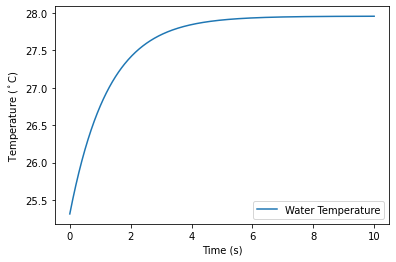

In [12]:
water_ts = [water_t]
obj_ts = [obj_t]
time = [0]

update_rate = 0.02 # seconds
simulation_time = 10 # seconds

for i in range(int(simulation_time/update_rate)):
    time.append(time[-1] + update_rate)
    
    teq = equilibrium_t(water_mass, water_c, water_ts[-1], coin_mass, obj_c, obj_ts[-1])
    heat = rate_of_heat(obj_k, surface_area, obj_ts[-1], water_ts[-1], coin_h * 10) * update_rate
    
    water_ts.append(water_ts[-1] + (heat/(water_c * water_mass)))
    obj_ts.append(obj_ts[-1] - (heat/(obj_c * coin_mass)))

plt.plot(time, water_ts, label="Water Temperature")
plt.plot(time, obj_ts, label="Object Temperature")
plt.xlabel('Time (s)')
plt.ylabel('Temperature ($^\circ$C)')
plt.legend()
plt.show()